# Module B: Chapter 17 Interpolation
## 17.4 Lagrange Polynomial Interpolation

### Example 1
Find the Lagrange basis polynomials for the data set x = [0, 1, 2] and y = [1, 3, 2]. Plot each polynomial and verify the property that Pi(xj)=1 when i=j and Pi(xj)=0 when i≠j.

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

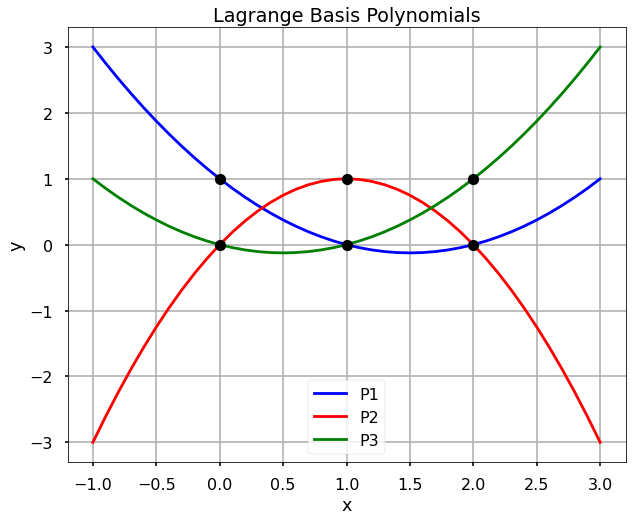

In [2]:
x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

## 17.4 Newton's Polynomial Interpolation
### Example 1 
Calculate the divided differences table for x = [-5, -1, 0, 2], y = [-2, 6, 1, 3].

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

In [4]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

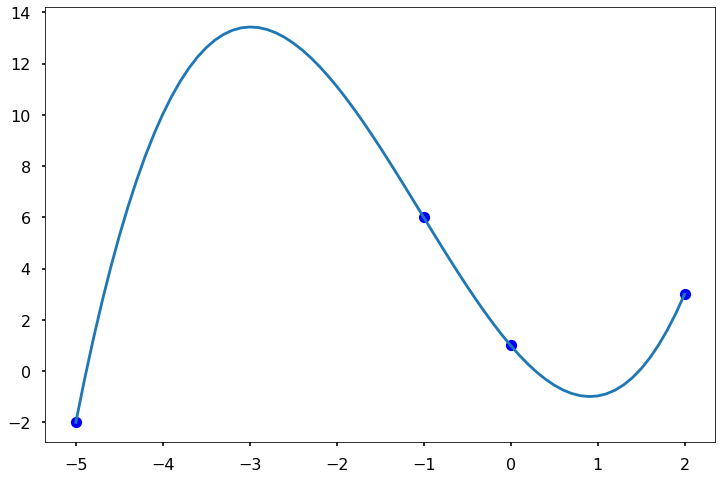

In [5]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)